**Instructor**: Prof. Keith Chugg (chugg@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import misc

# Clustering

/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_29892/1886822426.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image_raccoon = misc.face(gray=True)


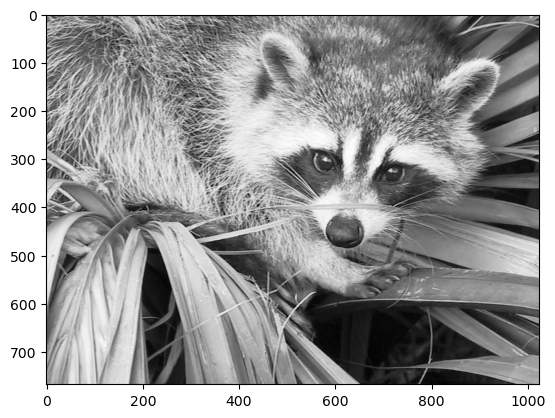

In [2]:
image_raccoon = misc.face(gray=True)
plt.imshow(image_raccoon,cmap=plt.cm.Greys_r) 

In [3]:
nrows = image_raccoon.shape[0]
ncolumns = image_raccoon.shape[1]

In [4]:
def algorithm_kmeans(k_clusters,image_raccoon,max_iterations):
    pixel_vals = image_raccoon.reshape((-1,1)) #convert image into column vector (SIZE, 1)
    mean_clusters = random.sample(list(pixel_vals),k_clusters)
    mean_clusters = np.hstack(mean_clusters).tolist()
    
    classes_clusters = {} 
    [classes_clusters.setdefault(i, []) for i in range(k_clusters)]
    
    nrows = pixel_vals.shape[0]
    
    for i in range(0,max_iterations):
        for index_row in range(0,nrows):
            classes_clusters[np.argmin(((mean_clusters-pixel_vals[index_row])**2))].append(index_row)
        new_mean_clusters = np.zeros(k_clusters)
        for k in range(0,k_clusters):
            new_points = classes_clusters[k]
            new_mean = np.mean(pixel_vals[new_points], axis=0)
            new_mean_clusters[k] = new_mean
        
        new_mean_clusters = np.hstack(new_mean_clusters).tolist()      
        if np.allclose(mean_clusters,new_mean_clusters):
            print("Number of Iterations until Convergence: ",i)
            return mean_clusters, classes_clusters
        else:
            mean_clusters = new_mean_clusters
            classes_clusters = {} 
            [classes_clusters.setdefault(i, []) for i in range(k_clusters)]
            

In [5]:
def image_plotting_kmeans(k,image_raccoon, mean_clusters,classes_clusters):
    nrows = image_raccoon.shape[0]
    ncolumns = image_raccoon.shape[1]
    segmented_data = np.zeros(nrows*ncolumns)
    for i in range(0,len(mean_clusters)):
        points_cluster = classes_clusters[i]
        for j in points_cluster:
            segmented_data[j] = mean_clusters[i]
    segmented_image = segmented_data.reshape(image_raccoon.shape)
    plt.imshow(segmented_image,cmap=plt.cm.Greys_r) 
    plt.title(f"k=%d" % k)
    plt.show()

Number of Clusters:  2
Number of Iterations until Convergence:  7


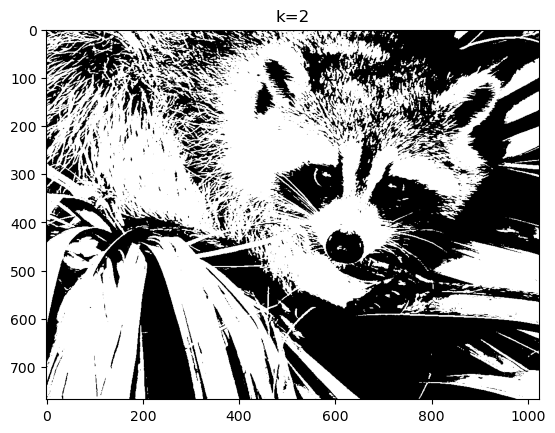

Number of Clusters:  4
Number of Iterations until Convergence:  8


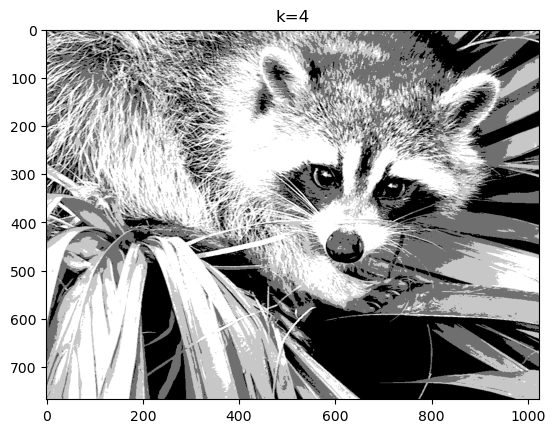

In [6]:
for k in [2, 4]:
    print('Number of Clusters: ',k )
    mean_clusters = []; classes_clusters = []
    mean_clusters, classes_clusters = algorithm_kmeans(k,image_raccoon,max_iterations=50)
    mean_clusters = np.uint8(mean_clusters).tolist()
    image_plotting_kmeans(k,image_raccoon,mean_clusters,classes_clusters)